In [1]:
!pip install pandas numpy matplotlib statsmodels

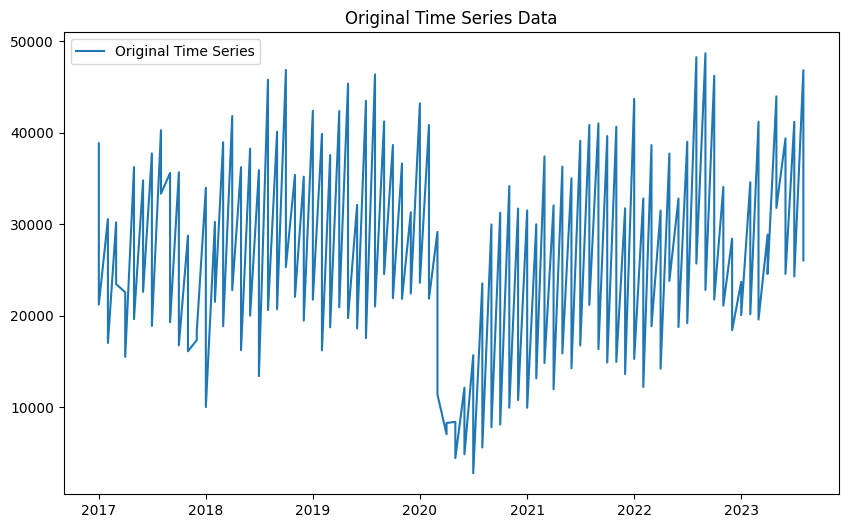

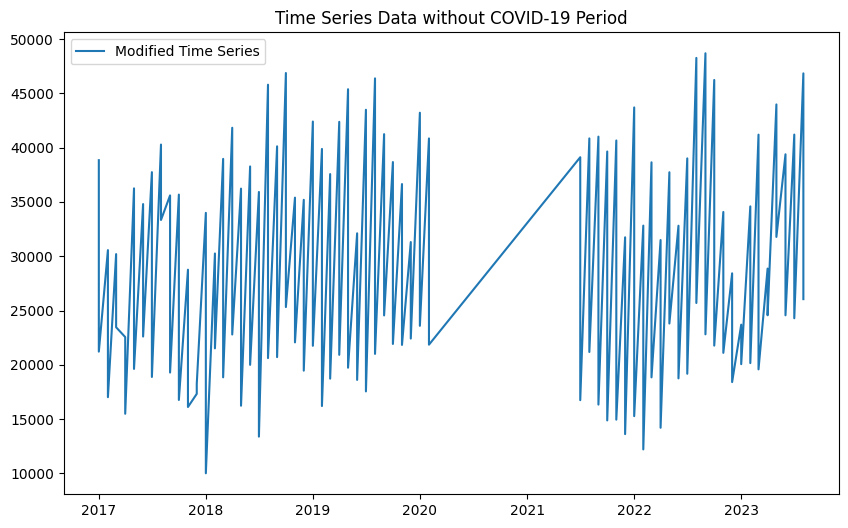

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

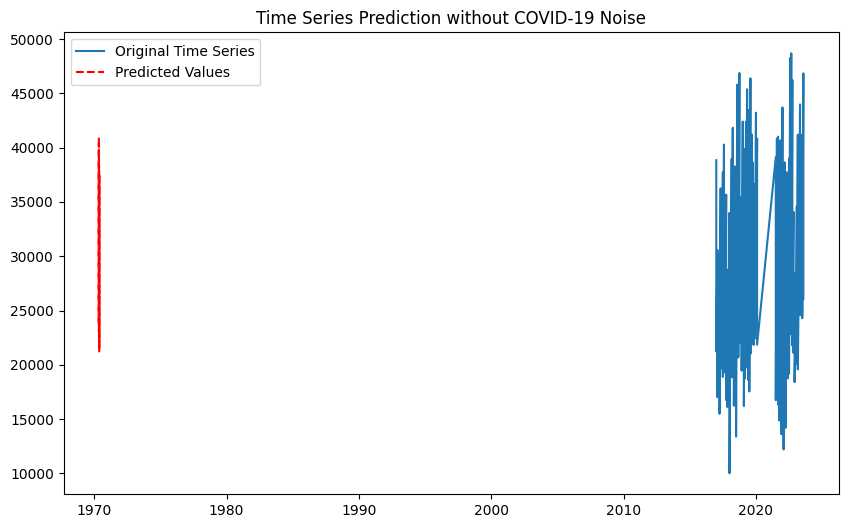

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load your time series data into a DataFrame (assuming a column 'Date' and 'Value')
# Replace 'your_data.csv' with your actual data file
data = pd.read_csv('processed-time-series.csv', sep=';')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Visualize the original time series
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original Time Series')
plt.title('Original Time Series Data')
plt.legend()
plt.show()

# Identify and remove the COVID-19 period
covid_start_date = pd.to_datetime('2020-03-01')
covid_end_date = pd.to_datetime('2021-06-01')
data = data.loc[~((data.index >= covid_start_date) & (data.index <= covid_end_date))]

# Visualize the modified time series without the COVID-19 period
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Modified Time Series')
plt.title('Time Series Data without COVID-19 Period')
plt.legend()
plt.show()

# Function to train ARIMA model and make predictions
def train_arima_model(data):
    model = ARIMA(data['Value'], order=(5, 1, 2))  # Adjust order based on your data
    results = model.fit()
    forecast = results.get_forecast(steps=12)  # Adjust the number of forecast steps as needed
    predicted_values = forecast.predicted_mean
    return predicted_values

# Train ARIMA model on the modified time series
predicted_values = train_arima_model(data)

# Visualize the original time series and predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original Time Series')
plt.plot(predicted_values, label='Predicted Values', linestyle='--', color='red')
plt.title('Time Series Prediction without COVID-19 Noise')
plt.legend()
plt.show()


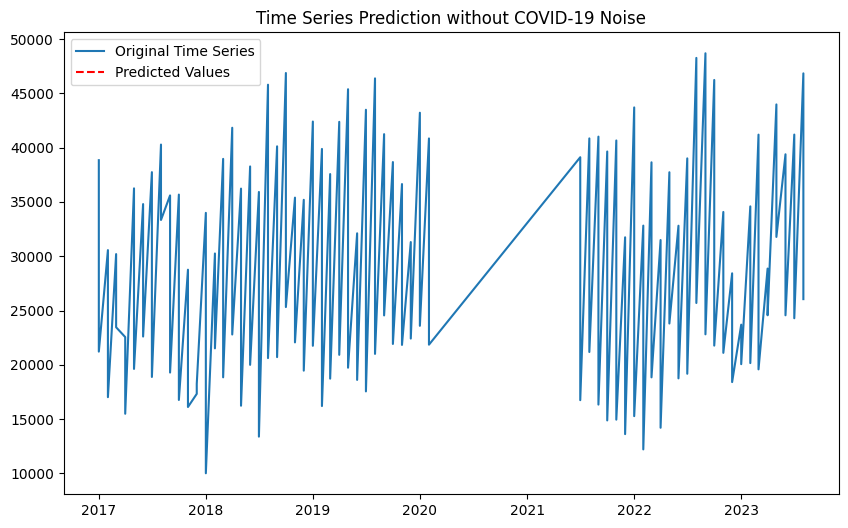

In [33]:
# Calculate the number of steps forward needed
forecast_steps = 12

# Convert the forecast index to datetime starting from the next period after the last date in the original data
forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')

# Create a DataFrame for the predicted values with the correct index
predicted_values_df = pd.DataFrame(predicted_values, index=forecast_index, columns=['predicted_mean'])

# Visualize the original time series and predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original Time Series')
plt.plot(predicted_values_df['predicted_mean'], label='Predicted Values', linestyle='--', color='red')
plt.title('Time Series Prediction without COVID-19 Noise')
plt.legend()
plt.show()


In [ ]:
!